In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:27<00:00, 43.4MB/s]
100% 1.06G/1.06G [00:27<00:00, 41.7MB/s]


In [5]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [6]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [7]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

58889256/58889256 [==============================] - 2s 0us/step


In [8]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [9]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 16812353 (64.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Here i freeze the trainable parameter

In [11]:
conv_base.trainable = False

In [12]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [13]:
# Normalize
def process(image,label):
    image = tensorflow.cast(image/255. ,tensorflow.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [14]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [15]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 61s 86ms/step - loss: 0.2728 - accuracy: 0.8845 - val_loss: 0.2448 - val_accuracy: 0.8954
Epoch 2/10
625/625 [==============================] - 65s 104ms/step - loss: 0.1976 - accuracy: 0.9179 - val_loss: 0.2250 - val_accuracy: 0.9056
Epoch 3/10
625/625 [==============================] - 56s 89ms/step - loss: 0.1650 - accuracy: 0.9336 - val_loss: 0.2193 - val_accuracy: 0.9104
Epoch 4/10
625/625 [==============================] - 56s 89ms/step - loss: 0.1400 - accuracy: 0.9437 - val_loss: 0.2255 - val_accuracy: 0.9082
Epoch 5/10
625/625 [==============================] - 56s 89ms/step - loss: 0.1216 - accuracy: 0.9511 - val_loss: 0.2300 - val_accuracy: 0.9118
Epoch 6/10
625/625 [==============================] - 65s 104ms/step - loss: 0.0989 - accuracy: 0.9603 - val_loss: 0.2666 - val_accuracy: 0.9110
Epoch 7/10
625/625 [==============================] - 65s 104ms/step - loss: 0.0768 - accuracy: 0.9709 - val_loss: 0.2990 - val_accura

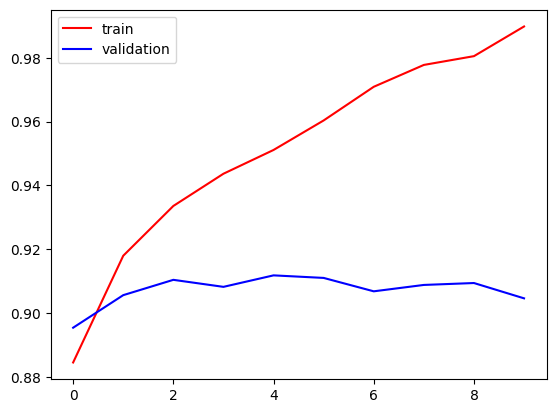

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

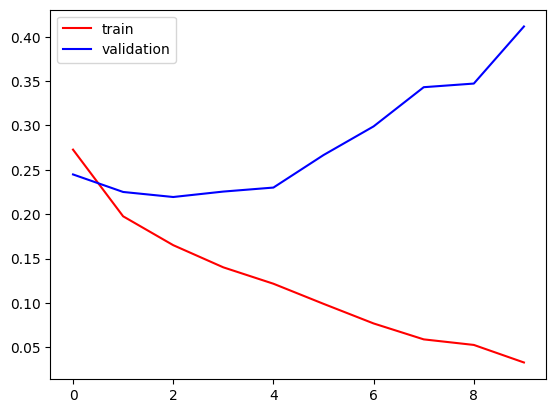

In [17]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

# Review

For the transfer learning task i use the pretrained model named VGG 16 that is designed fot the image classification task it consists of 16 layers, that includes 13 convolution layer and 3 fully connected layers and each convolutional layer followed by the max-pooling layer for downsampling.
<br>
<br>
The dataset that i use for the transfer learning task is Dogs Vs Cats dataset that i take from kaggel
<br>
<br>
What exacly transfer learning does that use the weights of pretrained model and at the end we have to add the dense layer of our own task.
<br>
<br>
And while training we freeze the weights and only train the dense layer. Here for dense layer i add one 256 layers dense layer and at the end use sigmoid for the output. 